In [48]:
import yfinance as yf
import pandas as pd
pd.set_option('display.max_rows', None)

In [24]:
import requests
import pandas as pd

def get_chicago_data(limit=1000, max_records=200_000):
    base_url = "https://data.cityofchicago.org/resource/rsxa-ify5.json"
    records = []
    offset = 0

    while offset < max_records:
        query_url = f"{base_url}?$limit={limit}&$offset={offset}"
        response = requests.get(query_url)

        if response.status_code == 200:
            data = response.json()
            if not data:  # Break the loop if no data is returned
                break
            records.extend(data)
            offset += limit
        else:
            print(f"Failed to retrieve data at offset {offset}")
            break

    return records

# Use the function to get data
chicago_data = get_chicago_data()

# Convert the data to a pandas DataFrame
if chicago_data:
    df = pd.DataFrame(chicago_data)
    # print(df)


In [26]:
df.head()

,purchase_order_description,purchase_order_contract_number,revision_number,specification_number,contract_type,approval_date,department,vendor_name,vendor_id,address_1,address_2,city,state,zip,award_amount,start_date,end_date,procurement_type,contract_pdf
0,DFSS-IDOA-SS-ORRC:,256161,0,1230563,DELEGATE AGENCY,2024-01-22T00:00:00.000,DEPT OF FAMILY AND SUPPORT SERVICES,SALVATION ARMY FAMILY & COMMUNITY SERVICES,25964717T,4800 N MARINE DR,STE 6,CHICAGO,IL,60630-2740,50000,NaN,NaN,NaN,NaN
1,DFSS-ARP-SS-SFBP:,256165,0,1250011,DELEGATE AGENCY,2024-01-22T00:00:00.000,DEPT OF FAMILY AND SUPPORT SERVICES,Top Box Foods,10597767,222 Merchandise Mart Plaza 11-131,NaN,Chicago,IL,60654,39815,NaN,NaN,NaN,NaN
2,DFSS-IDOA-SS-HWP:,256159,0,1241907,DELEGATE AGENCY,2024-01-22T00:00:00.000,DEPT OF FAMILY AND SUPPORT SERVICES,RUSH UNIVERSITY MEDICAL CENTER,105470052L,1700 W VAN BUREN ST,NaN,CHICAGO,IL,60612,107866,NaN,NaN,NaN,NaN
3,DFSS-ARP-YS-YIP,256297,0,1261336,DELEGATE AGENCY,2024-01-22T00:00:00.000,DEPT OF FAMILY AND SUPPORT SERVICES,ILLINOIS CRIMINAL JUSTICE,93676963E,INFORMATION AUTHORITY,300 W ADAMS ST STE 200,CHICAGO,IL,60606-3997,500000,NaN,NaN,NaN,NaN
4,DFSS-IDOA-SS-ORRC:,256160,0,1230563,DELEGATE AGENCY,2024-01-22T00:00:00.000,DEPT OF FAMILY AND SUPPORT SERVICES,SALVATION ARMY FAMILY & COMMUNITY SERVICES,25964717T,4800 N MARINE DR,STE 6,CHICAGO,IL,60630-2740,20000,NaN,NaN,NaN,NaN


In [30]:
df[df.vendor_name.str.contains('BRONNER')]

,purchase_order_description,purchase_order_contract_number,revision_number,specification_number,contract_type,approval_date,department,vendor_name,vendor_id,address_1,address_2,city,state,zip,award_amount,start_date,end_date,procurement_type,contract_pdf
1772,NON-TARGET MARKET FINANCIAL SERVICES- CATEGORY...,74265,2,148432,"PRO SERV CONSULTING $250,000orABOVE",2023-11-03T00:00:00.000,DEPARTMENT OF FINANCE,"BRONNER GROUP, LLC.",23186072H,120 N LA SALLE ST STE 1300,NaN,CHICAGO,IL,60602,0,2019-04-17T00:00:00.000,2027-04-17T00:00:00.000,MASTER AGREEMENT,NaN
3243,TARGET MARKET \nMASTER CONSULTING AGREEMENT FO...,223774,0,1222627,"PRO SERV CONSULTING $250,000orABOVE",2023-08-11T00:00:00.000,DEPT OF ASSETS INFORMATION AND SERVICES,"BRONNER GROUP, LLC.|CLEANED-UP",23186067E,120 N LASALLE STREET EFT,NaN,CHICAGO,IL,60602,25000000,2023-07-21T00:00:00.000,2027-07-31T00:00:00.000,MASTER AGREEMENT,NaN
6854,TARGET MARKET FINANCIAL SERVICES MASTER CONSUL...,27778,5,109397,"PRO SERV CONSULTING $250,000orABOVE",2023-03-10T00:00:00.000,DEPT OF PROCUREMENT SERVICES,"BRONNER GROUP, LLC.",23186072H,120 N LA SALLE ST STE 1300,NaN,CHICAGO,IL,60602,0,2013-05-13T00:00:00.000,2023-07-31T00:00:00.000,MASTER AGREEMENT,NaN
7667,TARGET MARKET IT MASTER CONSULTING AGREEMENT- ...,32559,2,121573,"PRO SERV CONSULTING $250,000orABOVE",2023-01-31T00:00:00.000,DEPT OF INNOVATION & TECHNOLOGY,"BRONNER GROUP, LLC.|CLEANED-UP",23186067E,120 N LASALLE STREET EFT,NaN,CHICAGO,IL,60602,0,2015-08-14T00:00:00.000,2023-07-31T00:00:00.000,MASTER AGREEMENT,NaN
14210,TARGET MARKET FINANCIAL SERVICES MASTER CONSUL...,27778,4,109397,"PRO SERV CONSULTING $250,000orABOVE",2022-03-24T00:00:00.000,DEPT OF PROCUREMENT SERVICES,"BRONNER GROUP, LLC.",23186072H,120 N LA SALLE ST STE 1300,NaN,CHICAGO,IL,60602,0,2013-05-13T00:00:00.000,2023-01-31T00:00:00.000,MASTER AGREEMENT,NaN
18009,TARGET MARKET IT MASTER CONSULTING AGREEMENT- ...,32559,1,121573,"PRO SERV CONSULTING $250,000orABOVE",2021-09-02T00:00:00.000,DEPT OF BUSINESS & INFORMATION SERVICES,"BRONNER GROUP, LLC.",23186072H,120 N LA SALLE ST STE 1300,NaN,CHICAGO,IL,60602,0,2015-08-14T00:00:00.000,2022-07-31T00:00:00.000,MASTER AGREEMENT,NaN
19414,NON-TARGET MARKET FINANCIAL SERVICES- CATEGORY...,74265,1,148432,"PRO SERV CONSULTING $250,000orABOVE",2021-06-11T00:00:00.000,DEPARTMENT OF FINANCE,"BRONNER GROUP, LLC.|CLEANED-UP",23186067E,120 N LASALLE STREET EFT,NaN,CHICAGO,IL,60602,0,2019-04-17T00:00:00.000,2024-04-16T00:00:00.000,MASTER AGREEMENT,NaN
20748,TARGET MARKET FINANCIAL SERVICES MASTER CONSUL...,28675,3,109397,"PRO SERV CONSULTING $250,000orABOVE",2021-04-07T00:00:00.000,DEPARTMENT OF FINANCE,"BRONNER GROUP, LLC.",23186072H,120 N LA SALLE ST STE 1300,NaN,CHICAGO,IL,60602,0,2014-03-17T00:00:00.000,2022-01-31T00:00:00.000,MASTER AGREEMENT,NaN
20767,TARGET MARKET FINANCIAL SERVICES MASTER CONSUL...,27778,3,109397,"PRO SERV CONSULTING $250,000orABOVE",2021-04-07T00:00:00.000,DEPT OF PROCUREMENT SERVICES,"BRONNER GROUP, LLC.",23186072H,120 N LA SALLE ST STE 1300,NaN,CHICAGO,IL,60602,0,2013-05-13T00:00:00.000,2022-01-31T00:00:00.000,MASTER AGREEMENT,NaN
32410,NON-TARGET MARKET FINANCIAL SERVICES- CATEGORY...,74265,0,148432,"PRO SERV CONSULTING $250,000orABOVE",2019-04-17T00:00:00.000,DEPARTMENT OF FINANCE,"BRONNER GROUP, LLC.|CLEANED-UP",23186067E,120 N LASALLE STREET EFT,NaN,CHICAGO,IL,60602,2400000,2019-04-17T00:00:00.000,2022-04-16T00:00:00.000,MASTER AGREEMENT,{'url': 'http://ecm.cityofchicago.org/eSMARTCo...


In [31]:
def get_chicago_data(limit=1000, max_records=310_000):
    base_url = "https://data.cityofchicago.org/resource/s4vu-giwb.json"
    records = []
    offset = 0

    while offset < max_records:
        query_url = f"{base_url}?$limit={limit}&$offset={offset}"
        response = requests.get(query_url)

        if response.status_code == 200:
            data = response.json()
            if not data:  # Break the loop if no data is returned
                break
            records.extend(data)
            offset += limit
        else:
            print(f"Failed to retrieve data at offset {offset}")
            break

    return records

# Use the function to get data
chicago_data = get_chicago_data()

# Convert the data to a pandas DataFrame
if chicago_data:
    df = pd.DataFrame(chicago_data)

In [32]:
df.head()

,amount,check_date,department_name,contract_number,vendor_name,cashed,voucher_number
0,63250,2021,DEPT OF FAMILY AND SUPPORT SERVICES,117293,YOUNG MEN'S EDUCATIONAL NETWORK,True,NaN
1,38554.81,2021,NaN,124392,TRAVELERS & IMMIGRANTS AID'S HEARTLAND ALLIANC...,True,NaN
2,6564854.9,2021,DEPARTMENT OF WATER MANAGEMENT,132636,GRANITE INLINER LLC.,True,NaN
3,447715.05,2021,DEPT OF FAMILY AND SUPPORT SERVICES,113818,"JUDAH INTERNATIONAL OUTREACH MINISTRIES, INC",True,NaN
4,188095,06/07/2023,DEPT OF BUSINESS & INFORMATION SERVICES,33232,"CDW GOVERNMENT, LLC.",True,PVCI23CI401457


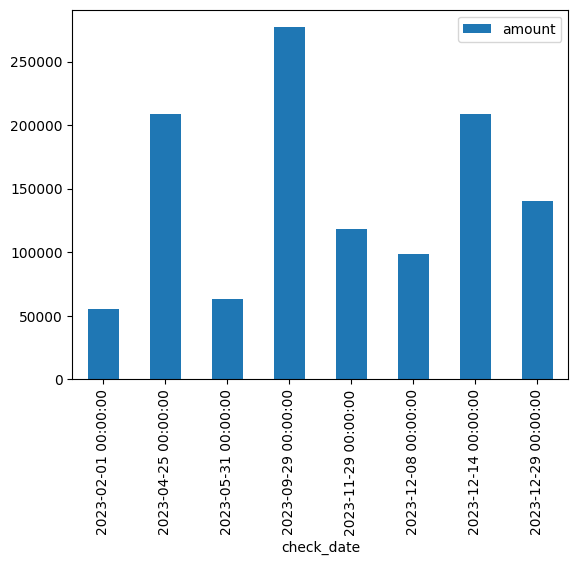

In [109]:
vendor_total = (df
                [df.vendor_name.str.contains('GUIDEHOUSE')]
                .dropna(subset=['department_name', 'voucher_number'])
                .drop_duplicates(subset=['amount', 'check_date', 'voucher_number'], keep='first')
                .astype({'amount':'float64', 'check_date': 'datetime64[ns]'})
                .set_index(['check_date'])
                .sort_index()
                .query('check_date.dt.year == 2023')
                .groupby('check_date')
                .agg({'amount':'sum'})
                .plot.bar()
                #.amount
                #.sum()
               )

# print(f'${vendor_total:,.2f}')